# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

### 035liste

In [16]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [17]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [18]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [20]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


161074                                         [(CEO)72224]
114736    [(OCoLC)1083702592, (IDSBB)007067562, (OCoLC)1...
144578    [(VAUDS)991002865954102853, (RERO)R008767484, ...
136713    [(SERSOL)ssib007875833, (VAUD)9910212175197028...
106194    [(SNL)991017950417703976, (Sz)991017950417703976]
30278     [(VAUDS)991002861957802853, (EXLNZ-41BCULAUSA_...
175433                    [(ALEX)9933034101791, (CEO)79000]
71096                                    [(IDSBB)004867240]
26250                  [(IDSLU)000007453, (IDSBB)004593830]
153596                                         [(CEO)45231]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [21]:
columns_metadata_dict['strings_columns'] = ['century']

In [22]:
idx_century_filled, idx_century_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'century')

daf.two_examples(df, idx_century_filled, idx_century_empty)

Number of records with filled century 183407, with missing century 0 => 100.0%

EMPTY - None

FILLED - index 0 

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 

Attribute $\texttt{century}$ holds information on the year of origin of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute holds strings of length 4 that can predominantly be interpreted as year-dates. Some examples and the top-most quantity distribution are shown below.

In [23]:
df['century'].sample(n=15)

169744    2002
176696    1960
165891    1983
96247     1982
27707     1978
99945     2019
119723    uuuu
169490    2016
113914    2018
91289     1998
19547     1965
55997     2005
8816      1937
104347    2018
176588    1992
Name: century, dtype: object

In [24]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [25]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [26]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [27]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

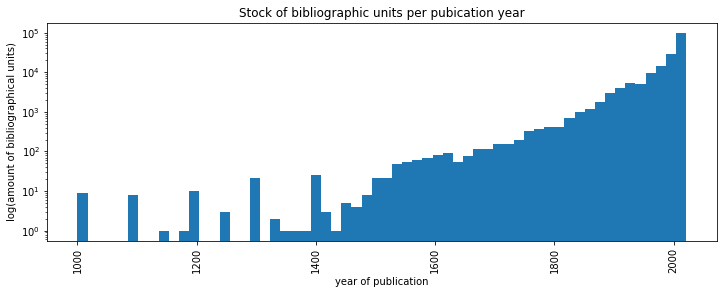

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

The attribute is taken over to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [29]:
columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [30]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [31]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [32]:
_, _ = daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [33]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

5031      [W0102900, N0552900]
105433    [E0091511, N0465150]
112470                      []
48697                       []
126822    [E0071429, N0470018]
113699    [E0084423, N0470935]
35995     [E0060450, N0464800]
114771    [E0063958, N0470012]
48065     [E0083000, N0463400]
147071    [W0050800, N0484500]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [34]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

53969              [E0080312, E0080322, N0475934, N0475924]
57054              [E0203500, E0201900, N0383100, N0383100]
145721             [E0053832, E0053842, N0465129, N0465123]
137878             [E0102620, E0102615, N0463834, N0463830]
102577    [E 009 05 00, E009.083333, N 047 15 00, N047.2...
137875             [E0074200, E0074200, N0463427, N0463400]
104201    [W1244400, E1722600, W1603200, N0492400, N0712...
136954    [E0083620, E0083624, E0083624, N0462105, N0462...
137877             [E0102620, E0102615, N0463834, N0463830]
143472             [E0064728, E0064725, N0461460, N0461455]
Name: coordinate, dtype: object

In [35]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [36]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed with the help of a function $\texttt{split}\_\texttt{coordinate()}$, [[WiCo2001](./A_References.ipynb#wico2001)].

In [37]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate_E}$.

In [38]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

26927     e0081700
109247    e0064929
110568    w1253000
23619     e0084346
27755     e0095238
114840    e0062628
23975     e0194200
144918    e1003000
126785    e0063326
18769     e0065100
111776    e0095930
27783     e0091310
76809     e0185900
114715    e0093325
47262     e0065900
20644     e0054415
110585    e0055427
106163    e0132922
83161     e0073547
113740    e0085123
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate_N}$.

In [39]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

114812    n0465029
77019     n0043500
110018    n0630000
126809    n0470018
104545    n0463833
114688    n0470615
122859    n0561900
28351     n0472302
86085     n0475407
182751    n0465035
114703    n0470552
27618     n0513600
103980    n0471841
23623     n0464010
35992     n0440947
36020     n0742129
110568    n0490000
12971     n0472021
86065     n0473346
126851    n0470018
Name: coordinate_N, dtype: object

In [40]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attriubte $\texttt{coordinate}$ is dropped.

In [41]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [42]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three possible key value pairs. For reasons of easier processing, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [43]:
df.corporate.sample(n=20)

69711                                                    {}
39930                                                    {}
99442                                                    {}
29020        {'710': ['Haus der Kulturen der Welt Berlin']}
67740                                                    {}
170348                 {'110': ['Comitetul olimpic român']}
182746                                                   {}
29359     {'110': ['Schweiz', 'Bundesamt für Landestopog...
124039                                                   {}
132471                                                   {}
84370                                                    {}
149130                                                   {}
33209                                                    {}
175931                                                   {}
97104                                                    {}
40305                                                    {}
55066                                   

In [44]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [45]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [46]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [48]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

162185    international association of athletics federat...
163745    olympic winter games. organizing committee . 2...
161251    summer olympic games. organizing committee. 28...
155724                 comitato olimpico nazionale italiano
92482                                      montres rolex sa
165764    olympic winter games. organizing committee . 2...
164356    national olympic committee of the republic of ...
152217    summer olympic games. organizing committee. 26...
151480    olympic winter games. organizing committee. 4,...
170337                           guilde du livre (lausanne)
154952    olympic winter games. organizing committee. 5,...
151192        comité national olympique et sportif français
149872    national olympic committee of the azerbaijani ...
157088    summer olympic games. organizing committee. 28...
160710                      united states olympic committee
168999    summer youth olympic games. organizing committ...
167267                 comitato olimpico

In [49]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

14460                                            underworld
149128                        great britain. sports council
169331                           sasakawa sports foundation
161881       great britain. foreign and commonwealth office
76694                    gesellschaft winterthurer jahrbuch
14300                                   marcos jimenez trio
74988                                        riedtli verein
175384    congrès international équipement de sport et p...
164062      fédération internationale des sociétés d'aviron
10318                               zürcher kammerorchester
73656           eidgenössische technische hochschule zürich
53881     slovenska akademija znanosti in umetnosti, uni...
101989                    archives départementales (loiret)
111917                         fiera artecasa (ponte tresa)
45432     ligue suisse contre le rhumatisme, association...
133927    martin-luther-universität halle-wittenberg, in...
76791                      kanton bern, 

In [50]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

104811                                 usa, war department
94673                                            hécatombe
72562                                        werbung kiser
72556                                        werbung kiser
110589                             hallwag kümmerly + frey
25264              schweiz, bundesamt für landestopografie
94674                                            hécatombe
30888              schweiz, bundesamt für landestopografie
113870                             peter-ochs-gesellschaft
61510                              hallwag kümmerly + frey
25406              schweiz, bundesamt für landestopografie
110572                             hallwag kümmerly + frey
110593                                           hema maps
110569                             hallwag kümmerly + frey
53969              schweiz, bundesamt für landestopografie
47145     biochemical society (great britain)., symposium.
28259              schweiz, bundesamt für landestopograf

In [51]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key value 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

In [52]:
columns_metadata_dict['data_analysis_columns'].append('corporate_110')
columns_metadata_dict['data_analysis_columns'].append('corporate_710')

### decade

In [53]:
columns_metadata_dict['strings_columns'].append('decade')

In [54]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


The attribute holds identical data to attribute $\texttt{century}$. Its MARC 21 definition is the same, too. The purpose of the field is to derive the decade of the year of origin of a bibliographic unit and store it for comparison. This is done in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{century}$ that takes the decade into specific consideration for attribute $\texttt{century}$. Therefore, attribute $\texttt{decade}$ will be dropped.

### docid

In [55]:
columns_metadata_dict['strings_columns'].append('docid')

In [56]:
idx_docid_filled, idx_docid_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [57]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [58]:
columns_metadata_dict['list_columns'].append('doi')

In [59]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


In [60]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [61]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

97607                                [10.5169/seals-791086]
96747                                [10.5169/seals-789971]
4504                                       [00656605612812]
97399                                [10.5169/seals-790788]
84896         [10.3929/ethz-b-000323376, 10.1093/ve/vey037]
77164                                [10.5169/seals-789714]
114215          [10.5167/uzh-165515, 10.3390/sports6040136]
46596                       [10.4159/harvard.9780674432215]
68647                        [10.1016/j.ijrobp.2018.09.023]
45534        [10.5167/uzh-164799, 10.1177/0300985818789466]
92404                              [urn:nbn:ch:bel-1288621]
109304    [10.3929/ethz-b-000325573, 10.1038/s41598-018-...
128538           [10.5167/uzh-166724, 10.1093/mnras/sty367]
112144             [10.5167/uzh-167385, 1932-8036/20180005]
89689                               [10.7591/9781501735981]
85346                          [10.1038/s41598-018-33763-7]
19538                                [10

In [62]:
df.loc[1854]

docid                                                    554099918
035liste         [(OCoLC)71126385, (IDSBB)007052820, (OCoLC)711...
isbn                                                            []
ttlfull          {'245': ['Symphony no. 8'], '246': ['Symphony ...
ttlpart                                {'245': ['Symphony no. 8']}
person           {'100': ['MahlerGustav1860-1911(DE-588)1185762...
corporate        {'710': ['Konzertvereinigung Wiener Staatsoper...
pubyear                                                   20062006
decade                                                        2006
century                                                       2006
exactDate                                                 20062006
edition                                                           
part                                                            []
pages                                               [1 Cd (79:48)]
volumes                                             [1 Cd (79:

In [63]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


Attribute $\texttt{doi}$ is a digital object identifier. It will be taken to the feature matrix without modification.

In [64]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [65]:
columns_metadata_dict['strings_columns'].append('edition')

In [66]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [67]:
df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=10)

1125      17., vermehrte, neu bearb. und verbesserte Aufl
62604                                     2., verb. Aufl.
145361                                      Erste Auflage
137173                            PS4 [English, français]
113839                                         1. Auflage
112246                              Verschiedene Auflagen
110566                 10. [Auflage], [Laufzeit bis] 2022
139802                          3., überarbeitete Auflage
139641                             Neuausgabe, 1. Auflage
3389                       Leicht gekürzte Hörbuchfassung
Name: edition, dtype: object

The attribute is taken to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [68]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [69]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [70]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [71]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,scale,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit.

In [72]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [73]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'-', ' ', 'u'}


In [74]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [75]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [76]:
df.loc[183319]

docid                                                    556987284
035liste                        [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                            []
ttlfull          {'245': ['Altered limbic and autonomic process...
ttlpart          {'245': ['Altered limbic and autonomic process...
person           {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                       {}
pubyear                                                   20190414
decade                                                        2019
century                                                       2019
exactDate                                                 20190414
edition                                                           
part                                            [40(15):1183-1187]
pages                                                           []
volumes                                                       

Due to its added information supply to attribute $\texttt{century}$, the attribute is taken to the feature matrix.

In [77]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [78]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis).

In [79]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [80]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

68388     bk020000
69881     bk020000
32249     bk020000
140748    bk020053
150516    bk020000
114922    bk020000
181690    bk020053
150515    bk020000
120306    bk020053
1523      bk020000
Name: format, dtype: object

In [81]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [82]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

154419    
167699    
161954    
171189    
150562    
168750    
151230    
168998    
149930    
164287    
Name: format, dtype: object

In [83]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [84]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of the bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this reason, the attribute is divided into 2 new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [85]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
127815,bk020000,bk,020000
66851,bk020000,bk,020000
94500,bk020000,bk,020000
174175,bk020000,bk,020000
56173,bk010053,bk,010053
1608,bk020000,bk,020000
70628,bk020000,bk,020000
139084,bk020053,bk,020053
38556,bk020053,bk,020053
84826,bk010000,bk,010000


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [86]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [87]:
columns_metadata_dict['list_columns'].append('isbn')

In [88]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [89]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

20199            [978-2-7089-5973-6]
43442     [978-0-19-969299-6 (hbk.)]
61667                [3-465-02605-5]
48304                [3-407-80061-4]
151427               [3-402-06373-5]
101562           [978-1-108-18550-9]
52125            [978-2-240-04463-1]
69977                [3-88979-027-5]
48530                [3-551-73335-X]
5674             [978-0-571-52861-5]
89891            [978-1-5017-1812-0]
183213           [978-3-319-94655-9]
2741                 [3-930710-76-5]
86964            [978-2-7381-0382-6]
158828               [1-4120-4659-9]
29002            [978-3-518-10743-0]
83405            [978-2-87854-972-0]
160967               [1-59197-728-2]
100686           [978-0-429-46757-8]
86866            [978-1-78643-116-5]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [90]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

61928                    [978-3-03810-218-2, 3-03810-218-0]
17627                    [978-88-8281-480-9, 88-8281-480-7]
16282                    [978-0-9947104-1-3, 0-9947104-1-0]
22692                    [978-3-7749-4119-9, 3-7749-4119-X]
98981     [978-0-7354-1752-6, 978-0-7354-1753-3, 978-0-7...
123200                   [978-3-8317-3169-5, 3-8317-3169-1]
114707    [978-1-4968-2159-1, 1-4968-2159-9, 978-1-4968-...
121129                   [978-3-319-98412-4, 3-319-98412-8]
142780                   [978-3-8440-6340-0, 3-8440-6340-4]
26354                    [978-3-589-24560-4, 3-589-24560-3]
135793    [978-3-8394-4202-9, 3-8394-4202-8 (EBook) : US...
5428                     [3-421-06246-3, 978-3-421-06246-8]
31867                    [978-3-8068-4476-4, 3-8068-4476-3]
127190    [978-3-8394-2219-9, 3-8394-2219-1, 978-3-8376-...
31050                    [978-3-905752-67-0, 3-905752-67-0]
54673                    [978-1-78698-004-5, 1-78698-004-5]
44316     [978-0-674-72969-8 (hbk. : alk

In [91]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

29,073 records hold 1 list element(s).
3,762 records hold 2 list element(s).
2,331 records hold 3 list element(s).
519 records hold 4 list element(s).
398 records hold 5 list element(s).
173 records hold 6 list element(s).
156 records hold 7 list element(s).
84 records hold 8 list element(s).
76 records hold 9 list element(s).
51 records hold 10 list element(s).
43 records hold 11 list element(s).
29 records hold 12 list element(s).
26 records hold 13 list element(s).
19 records hold 14 list element(s).
18 records hold 15 list element(s).
10 records hold 16 list element(s).
9 records hold 17 list element(s).
8 records hold 18 list element(s).
7 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
5 records hold 24 list element(s).
4 records hold 25 list element(s).
3 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list element(s).

In [92]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

56053     [978-2-7560-2238-3, 978-2-7560-2239-0, 978-2-7...
11393     [3-551-74191-3, 3-551-74192-1, 3-551-74193-X, ...
116242    [978-7-107-30418-7, 7-107-30418-6, 978-7-107-3...
20851     [4-89434-420-3, 4-89434-421-1, 4-89434-435-1, ...
31742     [978-7-5675-2659-4, 7-5675-2659-X, 978-7-5675-...
148140    [978-1-4742-3212-8, 1-4742-3212-4, 978-1-4742-...
126999    [978-1-315-60322-3, 1-315-60322-5, 0-7546-7843...
113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
39158     [978-3-11-044748-4, 3-11-044748-7, 978-3-11-04...
116180    [978-7-5619-3903-1, 7-5619-3903-5, 978-7-5619-...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [93]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [94]:
columns_metadata_dict['list_columns'].append('ismn')

In [95]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


In [96]:
i = 0
while len(df.isbn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


In [97]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

In [98]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [99]:
columns_metadata_dict['strings_columns'].append('musicid')

In [100]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [101]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [102]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
cr       1
mp       1
Name: format_prefix, dtype: int64

In [103]:
df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20)

12609            Schnoutz Records SCD 7
4373                      DG 459  557-2
75641                             om241
122962                          TZ 3011
7257                        CD SF 40010
3593      Deutsche Grammophon 457 631-2
46620        Bestellnummer: 1171393 000
9958                       0927-49173-2
14102                  Mercury 985828-5
15538                  Eye Q 4509939892
4333                      4029759065517
9663                        88985386632
23889                       DE131152SC2
134882                       K 2014 012
8506                  Mantra MNTCD 1038
47663                        HL00232485
96168                       RPL 2473/74
92550                             13941
14141             Atlantic 7567-82099-2
46254               Bestellnummer: 9991
Name: musicid, dtype: object

The attribute is taken to further processing steps as is.

In [104]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [105]:
columns_metadata_dict['list_columns'].append('pages')

In [106]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This information is part of $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [107]:
columns_metadata_dict['list_columns'] = ['part']

In [108]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a volume as a unique number.

In [109]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

110830                         [2:115-137]
75273                [Heft 2, Seite 55-62]
93397                             [Band 8]
20964           [dai 127-kan, dai 127-kan]
110050                             [72-1A]
75661                            [Bd 3, 3]
147968                                 [9]
95602                             [Band 4]
87208                       [volume 10780]
29480                     [Seiten 188-212]
125523                               [144]
61230                           [1):46-47]
172033          [2006, Vol. 2, S. 384-391]
104102                              [2012]
81081     [Jg. 30 (2000),Nr. 10, S. 27-31]
79756                [Band-Nr. 8217, 8217]
59215                             [Nr. 15]
54366               [Jg. 70, Heft 6(2018)]
112573                         [no. 13522]
69423                     [1990/1, 1990-1]
Name: part, dtype: object

In [110]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [111]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [112]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [113]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [114]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [115]:
df.person.sample(n=20)

95026     {'100': [], '700': ['EdmundsLaurel D.joint aut...
62369     {'100': ['StudniczkaFranz1860-1929(DE-588)1173...
10408                      {'100': [], '245c': ['Reamonn']}
40811     {'100': [], '700': ['KleifgenJo Anne', 'BondGe...
149949    {'100': ['BlümelCarl'], '245c': ['Beschreibung...
129863    {'100': [], '700': ['YbarraDaniel(RERO)A027571...
135514    {'100': ['BalogYeshaya P.1976-(DE-588)11672515...
37124                             {'100': [], '245c': ['']}
67379          {'100': ['AdamPaul'], '245c': ['Paul Adam']}
40913     {'100': ['RieckeE.Eduardb. 1845'], '700': ['Le...
86512     {'100': ['TsuchidaRyūtarō(DE-588)1159321671Ver...
46860     {'100': ['EggersglüssStephanauthor'], '700': [...
38772     {'100': ['AumannGeorgauthor'], '700': ['HauptO...
126544    {'100': [], '700': ['AkhmedovAlexanderjoint au...
53481     {'100': [], '700': ['LiuShide1932-(DE-588)1069...
88961                             {'100': [], '245c': ['']}
133950    {'100': ['WagnerE.'], '700': [

In [116]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [117]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

6521                                      von robert wetzel
98124                      [eva bergstraesser, maria flury]
59779                                           georg hajdu
24037     edited by claude ménard (professor (emeritus) ...
116950                                       poluse, martin
76731     [caroline j. falconer, janek s. lobmaier, mari...
94277     ole könnecke ; traduzione dal tedesco di chiar...
7822                                        orquesta aragon
166209    organōtikē epitropē olympiakōn agōnōn athēna 2004
1615           e. mörike ; mit 14 zeichnungen von hans meid
155315                       salt lake organizing committee
26422                      gabi elverich ... [et al.] (hg.)
125128                                    poppy j. anderson
163918                       ed. hellenic olympic committee
39562                               edited by carlo rovelli
37720                                         amanda shaver
146248    éditeur: office fédéral de la 

In [118]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

46885                                 windischherbertauthor
11931                                            lorentziny
99368     schlingloffdieter1928-(de-588)105209597verfass...
127850                                            schererm.
14914                                            larssonåsa
12006                                           niemackjudy
75837                                 allenmikeverfasseraut
121676                                         linderaudrey
61819                     brugièrefabien(rero)a027188731cre
78620                              sommermartinverfasseraut
149636                                         seyboldeugen
113608                               clarckkarlverfasseraut
99536                                     del franciasilvia
26152                      lundkvistsven(rero)a003536559cre
91948                            kilianisabelleverfasseraut
69476                   gionojean1895-1970(de-588)118717545
120695                                  

In [119]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

147634    ramakrishna1836-1886(de-588)11859799xgefeierte...
42910     janiakchristophauthor, meyerhans-jürgen1958-ed...
75061                                       amreinursulactb
133963             herreweghephilippe1947-(de-588)12306385x
142708        rosendahltobias(de-588)1162861525verfasseraut
121000                                           pintocosta
137308    cathomasrico1967-(de-588)12411850xherausgebere...
14221     laubrockingrid1970-(de-588)1019431067instrumen...
8141                                            hillierpaul
132125          michaelsenkatherine jánszky(rero)a003591248
47099     gaiserbirgiteditor, hessefriedrich w.editor, l...
5358                                             marcusemax
27126                                            peppéroger
163226                                          lauermartin
1897              meierjost1939-grockiana(de-588)1175433217
36265     bhatesaroja1942-(de-588)11802907xherausgebered...
73857     ambrusgauthier, jacobfrançois1

In [120]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

77856                                  legrainthomassisco10
45463                                       midamgame over3
60938                            ceppidaniel1951-unterwegs4
19777                         pinardphilippeciel de guerre2
109236                        rutishauserwalter1940-2017fdp
85268                                ohbatsugumideath note8
124401    lonerganbernard j. f.works19882., lonerganbern...
25423                       marxkarlbriefe, marxkarlwerke34
180017                                              nobdad3
49685                               cuvelliervincentemile11
76103                               mittonjean-yvesalwilda1
47174       goethejohann wolfgang von1749-1832werke goethes
78359         prigovdmitriĭ aleksandrovichsobranie stikhov1
92677                         gillotlaurencelulu-grenadine9
138566             thurstonbryan cyrilbryan cyril thurston1
70501                       corneillepierrethéâtre complet1
177637                        rutishause

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [121]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.1972-(de-588)141498587verfasseraut,,jemisinn.k.1972-the broken earth1
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix, though.

In [122]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [123]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [124]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [125]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [126]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [127]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

118519                           [publisher not identified]
153841                                             [Pelham]
119104                           [publisher not identified]
138821                [New York: Columbia University Press]
120089                           [publisher not identified]
162385                                   [China Post Group]
133344                                             [[s.n.]]
168070    [The PyeongChang Organizing Committee for the ...
165499                              [Comissão Organizadora]
37242                    [Lincoln Institute of Land Policy]
119408                           [publisher not identified]
153400                                             [[s.n.]]
153705                                              [LOCOG]
16522                                    [SCM R. Brockhaus]
9511                                [(R. Schweizer-Gruner)]
23100                              [Transaction Publishers]
116907                    [Evangelical T

Two kinds of entries stand out as special in the sample data.

In [128]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [129]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will be handled as regular publisher's description, too.

In [130]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [131]:
columns_metadata_dict['list_columns'] = ['pubword']

In [132]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [133]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [134]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [135]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},{'100': ['ShawGeorge H.Verfasserautauthttp://i...,{},2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.verfasserautauthttp://id,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgenHerausgebere...",{},2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgenherausgeberedtedthttp://id, kühne...",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...",{'100': ['AmreinWilhelm1872-1946(DE-588)116302...,{},1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm1872-1946(de-588)116302429verfass...,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '245c': ['Idee & Ill. M...",{},2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [136]:
columns_metadata_dict['strings_columns'].append('scale')

In [137]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [138]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [139]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


The attribute will be taken over to further processing as is [[WiCo2001](./A_References.ipynb#wico2001)].

In [140]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [141]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [142]:
df.ttlfull.sample(n=20)

157562    {'245': ['Jeux olympiques à Anvers (Belgique) ...
92534     {'245': ['Reorienting the nations', 'perspecti...
78437     {'245': ['Mourir', 'un défi relationnel pour l...
167281                          {'245': ['Supplier guide']}
58155     {'245': ['Kübelmarkt mit Bindhausschopf', 'Blu...
12795     {'245': ['Traumvorstellung Liebe', 'der Irrtum...
119022    {'245': ['Reinhold Niebuhr to William L. Savag...
52065     {'245': ['Conventional Water Resources and Agr...
166493    {'245': ['Collision course', 'the Olympic trag...
5723                            {'245': ['American dream']}
128462            {'245': ['Auch Monster müssen schlafen']}
131675                                   {'245': ['Ethik']}
154349    {'245': ['XIV Olympiad London 1948', 'official...
11962     {'245': ['Der stille Krieg der Freimaurerei ge...
170632      {'245': ['La régate', 'tactique et stratégie']}
170661    {'245': ['All the moves', 'a history of colleg...
150272    {'245': ['Tennis', 'brochure e

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [143]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull_245}$, is filled for every record in the data set. This makes the attribute a central attribute for records pair comparison. Attribute $\texttt{ttlfull_246}$ on the other hand is sparsely filled. Some samples are shown below.

In [144]:
df.ttlfull_245.sample(20)

83339     divercities, understanding super-diversity in ...
11734     sonnenwege, sonnenuhren, elementar-geometrisch...
160696    jeux de la xxiie olympiade moscou 1980, résult...
159708                                                sport
51885     dynamic soil-structure interaction for sustain...
60623                                             überleben
170959    jeux de la xxvie olympiade, atlanta 1996, broc...
122693              the devī bhāgavata and the devī legends
112995    buchstabenkarten deutschschweizer basisschrift...
116184    ressources végétales et écoomie de subsistance...
160824    l'équipe de france olympique, xixe jeux olympi...
83932                              a karma megnyilvánulásai
173069                                        styrsky - zyw
120824    konstruktion von männlichkeit in kindheitspäda...
175447                                            the arrow
131034    einführung in die moderne phänomenologie, phän...
105389    lexikon für das it-recht 2019,

In [145]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

56963      selbstreferenz und selbstreflexion in a/v-medien
83792                 aṯ-ṯawra al-ʿurubiyya, الثورة العربية
64180     articles to be inquired of in the visitation o...
109046    impact of the supreme court's garcia decision ...
145989                                    charles james fox
89081     political representation and policy congruence...
54096                                    key moments in art
50889                            ieee trans. automat. contr
135342                                handbook of midwifery
64412                      exposition with notes on iohn 17
33988                              l'omnisports, omnisports
143049    treatise on the law of taxation, including the...
35801                                        nacktschnecken
52115                          essential american tradition
90484                                      vals - valsertal
129071                                  compleat arbitrator
58518               lernwerkstatt diktat

In [146]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


The two new columns will be used as a basis for the data of the feature matrix.

In [147]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [148]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [149]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [150]:
df.ttlpart.sample(n=20)

163252    {'245': ['Des femmes au monde des hommes', 'la...
164205             {'245': ['The Olympic games and music']}
29484     {'245': ['Stille.Nacht - was wir hören können,...
54724                     {'245': ['Cat Person', 'Storys']}
155398    {'245': ['Manuel du centre d'information sport...
147864                     {'245': ['L'amore a due passi']}
53638     {'245': ['Prophet or traitor?', 'the Jimmy Hog...
93398     {'245': ['Energieeffiziente Baustandards für N...
99094     {'245': ['Impact of cardio-renal syndrome on a...
86776                              {'245': ['Los logos 2']}
153652    {'245': ['Sports finance and management', 'rea...
158871    {'245': ['Le Canada aux Jeux', 'statistiques s...
160631    {'245': ['Olimpic Games 2004', 'Athens Olympic...
62165     {'245': ['Zhongguo chuantong xiaoshuo xushi mo...
134105                        {'245': ['American dervish']}
101143    {'245': ['The Excerpta Constantiniana and the ...
139225    {'245': ['Le perturbateur d'Is

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [151]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [152]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [153]:
columns_metadata_dict['list_columns'].append('volumes')

In [154]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages, volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Some examples are shown below.

In [155]:
df['volumes'].sample(n=15)

104007                        []
3151                    [412 S.]
18836          [xii, 236 Seiten]
55187                   [116 p.]
122077      [1 Online-Ressource]
150527                  [117 p.]
80511                     [4 p.]
110015                        []
26669                [55 Seiten]
33175                         []
180857    [365 p., [16] S. Taf.]
109138                        []
26130                  [2 Teile]
41087        [1 online resource]
136184       [1 online resource]
Name: volumes, dtype: object

The attribute comes along as a list of one string element. A function for data preparation has been written to extract the element out of the list and store it as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [156]:
df = dpf.transform_list_to_string(df, 'volumes')

In [157]:
df['volumes'].sample(n=15)

8873                                        1 compact disc
43547    1 online resource (online-ressource (vii, 131 ...
23252                                                     
32048                                               1 band
71371                                            p. 49-273
12359                                       1 schallplatte
28959                                         xviii, pages
89798                                    1 online resource
38709                                    1 online resource
25916                                               616 p.
75138                                               1 band
8912                                            1 partitur
24667                                               2 tle.
22063                                                     
34098                                                     
Name: volumes, dtype: object

In [158]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


In [159]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [160]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [161]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).